<h1 align=center><font size = 5>Combining Data from different Sources</font></h1>

In many “real world” situations, the data that we want to use come in multiple files. We often need to combine these files into a single DataFrame to analyze the data. The pandas package provides [various methods for combining DataFrames](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) including merge and concat.

To work through the examples below, we first need to load the species and surveys files into pandas DataFrames. 

In [1]:
import pandas as pd
surveys_df = pd.read_csv("surveys.csv",
                         keep_default_na=False, na_values=[""])
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [2]:
species_df = pd.read_csv("species.csv",
                         keep_default_na=False, na_values=[""])

Take note that the read_csv method we used can take some additional options which we didn’t use previously. Many functions in Python have a set of options that can be set by the user if needed. In this case, we have told pandas to assign empty values in our CSV to NaN keep_default_na=False, na_values=[""]. More about all of the read_csv options [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv).

## Concatenating DataFrames

We can use the concat function in pandas to append either columns or rows from one DataFrame to another. Let’s grab two subsets of our data to see how this works.

In [3]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)

survey_sub

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [4]:

# Grab the last 10 rows
survey_sub_last10 = surveys_df.tail(10)



In [5]:

# Reset the index values to the second dataframe appends properly
survey_sub_last10 = survey_sub_last10.reset_index(drop=True)
# drop=True option avoids adding new index column with old index values

When we concatenate DataFrames, we need to specify the axis. axis=0 tells pandas to stack the second DataFrame UNDER the first one. 
It will automatically detect whether the column names are the same and will stack accordingly. axis=1 will stack the columns in the second DataFrame to the RIGHT of the first DataFrame. 
To stack the data vertically, we need to make sure we have the same columns and associated column format in both datasets. 
When we stack horizontally, we want to make sure what we are doing makes sense (i.e. the data are related in some way).

In [6]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)

Row Index Values and Concat
Have a look at the vertical_stack dataframe? Notice anything unusual? The row indexes for the two data frames survey_sub and survey_sub_last10 have been repeated. We can reindex the new dataframe using the reset_index() method.

## Writing Out Data to CSV
We can use the to_csv command to do export a DataFrame in CSV format. Note that the code below will by default save the data into the current working directory. We can save it to a different folder by adding the foldername and a slash to the file vertical_stack.to_csv('foldername/out.csv'). We use the ‘index=False’ so that pandas doesn’t include the index number for each line.

In [7]:
# Write DataFrame to CSV
vertical_stack.to_csv('out.csv', index=False)

Check out your working directory to make sure the CSV wrote out properly, and that you can open it! If you want, try to bring it back into Python to make sure it imports properly.

In [8]:
# For kicks read our output back into Python and make sure all looks good
new_output = pd.read_csv('out.csv', keep_default_na=False, na_values=[""])

new_output

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


## Joining DataFrames
When we concatenated our DataFrames we simply added them to each other - stacking them either vertically or side by side. Another way to combine DataFrames is to use columns in each dataset that contain common values (a common unique id). Combining DataFrames using a common field is called “joining”. The columns containing the common values are called “join key(s)”. Joining DataFrames in this way is often useful when one DataFrame is a “lookup table” containing additional data that we want to include in the other.

**NOTE**: This process of joining tables is similar to what we do with tables in an SQL database.

For example, the species.csv file that we’ve been working with is a lookup table. This table contains the genus, species and taxa code for 55 species. The species code is unique for each line. These species are identified in our survey data as well using the unique species code. Rather than adding 3 more columns for the genus, species and taxa to each of the 35,549 line Survey data table, we can maintain the shorter table with the species information. When we want to access that information, we can create a query that joins the additional columns of information to the Survey data.

Storing data in this way has many benefits including:

It ensures consistency in the spelling of species attributes (genus, species and taxa) given each species is only entered once. Imagine the possibilities for spelling errors when entering the genus and species thousands of times!
It also makes it easy for us to make changes to the species information once without having to find each instance of it in the larger survey data.
It optimizes the size of our data.


## Joining Two DataFrames

To better understand joins, let’s grab the first 10 lines of our data as a subset to work with. We’ll use the .head method to do this. We’ll also read in a subset of the species table.

In [10]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)

# Import a small subset of the species data designed for this part of the lesson.
# It is stored in the data folder.
species_sub = pd.read_csv('speciesSubset.csv', keep_default_na=False, na_values=[""])

In this example, species_sub is the lookup table containing genus, species, and taxa names that we want to join with the data in survey_sub to produce a new DataFrame that contains all of the columns from both species_df and survey_df.

## Identifying join keys
To identify appropriate join keys we first need to know which field(s) are shared between the files (DataFrames). We might inspect both DataFrames to identify these columns. If we are lucky, both DataFrames will have columns with the same name that also contain the same data. If we are less lucky, we need to identify a (differently-named) column in each DataFrame that contains the same information.

In [13]:
species_sub.columns





Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [14]:
survey_sub.columns


Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In our example, the join key is the column containing the two-letter species identifier, which is called species_id.

Now that we know the fields with the common species ID attributes in each DataFrame, we are almost ready to join our data. However, since there are different types of joins, we also need to decide which type of join makes sense for our analysis.

## Inner joins
The most common type of join is called an inner join. An inner join combines two DataFrames based on a join key and returns a new DataFrame that contains only those rows that have matching values in both of the original DataFrames.

Inner joins yield a DataFrame that contains only rows where the value being joined exists in BOTH tables. An example of an inner join, adapted from Jeff Atwood’s blogpost about SQL joins is below:

The pandas function for performing joins is called merge and an Inner join is the default option:

In [15]:
merged_inner = pd.merge(left=survey_sub, right=species_sub, left_on='species_id', right_on='species_id')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged_inner.shape
merged_inner

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
7,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent


The result of an inner join of survey_sub and species_sub is a new DataFrame that contains the combined set of columns from survey_sub and species_sub. It only contains rows that have two-letter species codes that are the same in both the survey_sub and species_sub DataFrames. In other words, if a row in survey_sub has a value of species_id that does not appear in the species_id column of species, it will not be included in the DataFrame returned by an inner join. Similarly, if a row in species_sub has a value of species_id that does not appear in the species_id column of survey_sub, that row will not be included in the DataFrame returned by an inner join.

The two DataFrames that we want to join are passed to the merge function using the left and right argument. The left_on='species' argument tells merge to use the species_id column as the join key from survey_sub (the left DataFrame). Similarly , the right_on='species_id' argument tells merge to use the species_id column as the join key from species_sub (the right DataFrame). For inner joins, the order of the left and right arguments does not matter.

The result merged_inner DataFrame contains all of the columns from survey_sub (record id, month, day, etc.) as well as all the columns from species_sub (species_id, genus, species, and taxa).

Notice that merged_inner has fewer rows than survey_sub. This is an indication that there were rows in surveys_df with value(s) for species_id that do not exist as value(s) for species_id in species_df.



## Scatter plot

One good visualisation plot for comparing two variables against each other is a scatter plot. We will do scatterplots in more detail 
but using the data above we are going to create a scatterplot of hindfoot_length against genus 



Text(0.5, 0, 'genus')

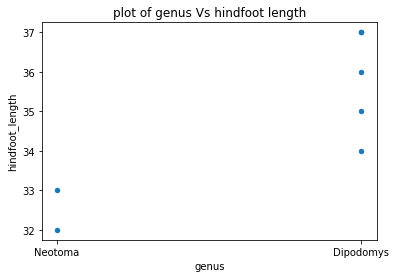

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
merged_inner.plot(kind='scatter', x='genus',y='hindfoot_length')


plt.title('plot of genus Vs hindfoot length')
plt.ylabel('hindfoot_length')
plt.xlabel('genus')

## Left joins

What if we want to add information from species_sub to survey_sub without losing any of the information from survey_sub? In this case, we use a different type of join called a “left outer join”, or a “left join”.

Like an inner join, a left join uses join keys to combine two DataFrames. Unlike an inner join, a left join will return all of the rows from the left DataFrame, even those rows whose join key(s) do not have values in the right DataFrame. Rows in the left DataFrame that are missing values for the join key(s) in the right DataFrame will simply have null (i.e., NaN or None) values for those columns in the resulting joined DataFrame.

Note: a left join will still discard rows from the right DataFrame that do not have values for the join key(s) in the left DataFrame.

A left join is performed in pandas by calling the same merge function used for inner join, but using the how='left' argument:

In [17]:
merged_left = pd.merge(left=survey_sub, right=species_sub, how='left', left_on='species_id', right_on='species_id')
merged_left

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


The result DataFrame from a left join (merged_left) looks very much like the result DataFrame from an inner join (merged_inner) in terms of the columns it contains. However, unlike merged_inner, merged_left contains the same number of rows as the original survey_sub DataFrame. When we inspect merged_left, we find there are rows where the information that should have come from species_sub (i.e., species_id, genus, and taxa) is missing (they contain NaN values):

In [18]:
merged_left[ pd.isnull(merged_left.genus) ]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


These rows are the ones where the value of species_id from survey_sub (in this case, PF) does not occur in species_sub.

## Other join types
The pandas merge function supports two other join types:

* Right (outer) join: Invoked by passing how='right' as an argument.Similar to a left join, except all rows from the right 
  DataFrame are kept, while rows from the left DataFrame without matching join key(s) values are discarded.
* Full (outer) join: Invoked by passing how='outer' as an argument. This join type returns the all pairwise combinations of rows from both DataFrames; i.e., the result DataFrame 
  will NaN where data is missing in one of the dataframes. This join type is very rarely used.


## Exercise


Create a new DataFrame by joining the contents of the surveys.csv and species.csv tables. Then using a scatterplot plot the 

taxa against hindfoot_length



Text(0, 0.5, 'hindfoot_length')

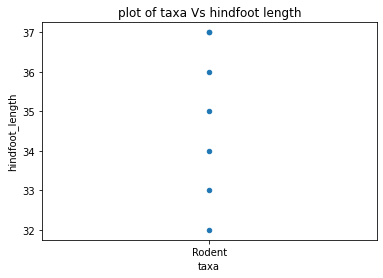

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
merged_inner.plot(kind='scatter', x='taxa',y='hindfoot_length')


plt.title('plot of taxa Vs hindfoot length')
plt.ylabel('hindfoot_length')